## Analysis of NYCFlights Data by Aditya Rajesh Wakade


In [115]:
#IPython is what you are using now to run the notebook
import IPython
# Numpy is a library for working with Arrays
import numpy as np
# SciPy implements many different numerical algorithms
import scipy as sp
# Pandas makes working with data tables easier
import pandas as pd
# Module for plotting
import matplotlib as plt
%matplotlib inline
import statsmodels.discrete.discrete_model as sm
from patsy import dmatrices
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [151]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv('flights.csv')

In [152]:
# Adding a date column in the dataframe by combining Year Month and Day
str_list = list()
for index, row in flights_df.iterrows():
    temp = str(row['month']) + '/' + str(row['day']) + '/' + str(row['year'])
    str_list.append(temp)

In [153]:
flights_df['date'] = str_list

### 1. Analysis of Seasonal Trends

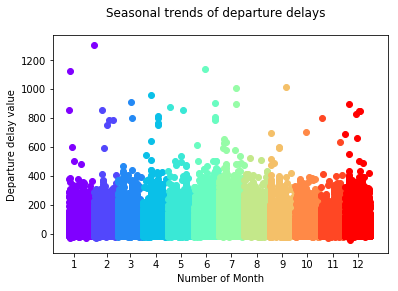

In [119]:
# setting 12 different colors from blue to red in steps of 12
colors = plt.cm.rainbow(np.linspace(0, 1, 12))


fig, ax = plt.pyplot.subplots()


# Iterating 12 combinations of unique months and colors and plotting departure delay for every flight every day for every month.
for color, mon in zip(colors, flights_df.month.sort_values().unique()):
    ax.scatter(flights_df.date[flights_df.month == mon], flights_df.dep_delay[flights_df.month == mon], color = color)

# setting custome x ticks on x axis for month values from 1 to 12
# we place the x ticks on 16th of each month as 16 is a middle date tentatively.
ax.set_xticks(flights_df.date[flights_df.day.sort_values() == 16].unique())
ax.set_xticklabels(flights_df.month.unique())
fig.suptitle('Seasonal trends of departure delays')
plt.pyplot.xlabel('Number of Month')
plt.pyplot.ylabel('Departure delay value')
plt.pyplot.show()

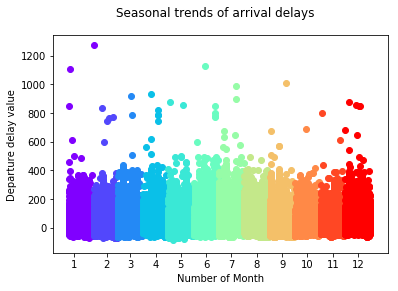

In [120]:
# setting 12 different colors from blue to red in steps of 12
colors = plt.cm.rainbow(np.linspace(0, 1, 12))


fig, ax = plt.pyplot.subplots()


# Iterating 12 combinations of unique months and colors and plotting departure delay for every flight every day for every month.
for color, mon in zip(colors, flights_df.month.sort_values().unique()):
    ax.scatter(flights_df.date[flights_df.month == mon], flights_df.arr_delay[flights_df.month == mon], color = color)

# setting custome x ticks on x axis for month values from 1 to 12
# we place the x ticks on 16th of each month as 16 is a middle date tentatively.
ax.set_xticks(flights_df.date[flights_df.day.sort_values() == 16].unique())
ax.set_xticklabels(flights_df.month.unique())
fig.suptitle('Seasonal trends of arrival delays')
plt.pyplot.xlabel('Number of Month')
plt.pyplot.ylabel('Departure delay value')
plt.pyplot.show()

I observed the following seasonal patterns from the visualization

1. Christmas, year end and New year sees a lot of departure delays from New York. Holiday season during December and bad weather in winter can be reasons for large departure delays at end of december and start of January. We can see anomolously high departure delays at the start of January and end of December. We can see anomolously high departure delays at the start of January.
2. We see that September, October and November  see the lowest departure delays, so Autum can be associated with lower departure delays. during the Fall/Autumn months of September October November the delays are very low as people are busy with their professional and academic life and do not tend to travel in this season. 
3. The departure delays increase steadily from Feb onwards and become maximum in June and July. We can say that departure delays are maximum in Summer.  This may be because of the high amount of traffic at the New York airports during the summer. We know that New York is a hub/ gateway for International Flights to Europe from America. During the months June and July when the summer season is going on, people prefer to travel for holidays and also lot of people visit or leave New York itself as it one of the most popular cities in the world. Hence, lots of passenger and maintenance load is present at NEW YORK airports. Hence, there is a seasonal trend in the delays.

(d) On average, how do departure delays vary over the course of a day?

We plot the day timings on the y axis and departure delays on the x axis. Red color shows positive delay while blue shows negative delay.

C:\Users\wakad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sign
  This is separate from the ipykernel package so we can avoid doing imports until


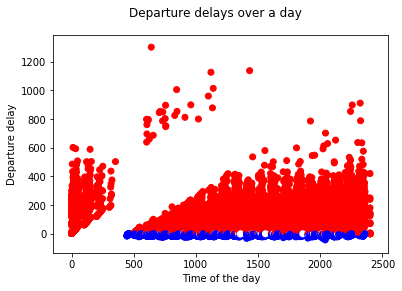

In [121]:
fig1, ax1 = plt.pyplot.subplots()
for day in flights_df.date.unique():
    ax1.scatter(flights_df.dep_time[flights_df.date == day], flights_df.dep_delay[flights_df.date == day], c=np.sign(flights_df.dep_delay[flights_df.date == day]), cmap="bwr")

fig1.suptitle('Departure delays over a day')
plt.pyplot.xlabel('Time of the day')
plt.pyplot.ylabel('Departure delay')
plt.pyplot.show()
    

We have the following observations from the graph and mean departure delay values over the day

1. From midnight to 4 am, the mean departure delays increases steadily. The lower values of departure delays increase. Although the mean value increases, the total departure delay is maximum for midnight and decreases till 4 am. This might be because there are less number of flights early morning and more flights close to midnight.

2. 4 am to 6 am sees negative average departure delays which means flights leave before time. From 7 am onwards, the departure delays become average positive and slowly keep increasing. The mean departure delay values are negligible as compared to the range of the total dataset. From 4 am to around 1 pm the departure delay values increases from low to high almost linearly BUT with anomolous outliers with departure delay values more than 600.

3. From 3 pm to 7 pm the average departure delays stay below 20. The total delay increases steadily.

4. After 7 pm to midnight  the number of flights becomes high and the delay increases largely. Although the mean delay is lower than midnight and after midnight, the total delay is large. This tells us that a lot of flights get delayed but not by anomolously large values. The delays increase till midnight and then start getting low again after midnight.

5. Also, negative delay is introduced in the day only after 4 am in the morning.

Overall, the delay is moderately large at midnight, and decreases till 7 am. After 7 am it steadily increases till 3 along with some anomolously large values.  After 3 pm it increases slowly till 7 pm and from 7 pm to midnight the delays increase very sharply.

## The research question I want to address is, " Do the flights show lower arrival and departure delays if their destination is the headquarters of the carrier of that flight?"

 #### To support this research question, I have chosen three major cities in America and I will compare the delays at those destinations  for all carriers which fly there. The cities are, 
 1) Seattle (Headquarters of Alaskan Airlines). 
 2) Chicago (Headquarters of United Airlines and major HUB for American Airlines). 
 3) Atlanta (Headquarters of Delta Airlines).These three cities harbor one of the largest airlines in America and are in different directions and distancese from New York which is the source of all flights.

### City 1: Seattle. 
A. We find all the unique carriers which fly to Seattle. There are 5 unique carriers which include Alaskan Airlines

In [154]:
# Finding the unique carriers at a location
## City 1: Seattle. Headquarters of Alaskan Airlines
unique_carriers_city1 = flights_df.carrier[flights_df['origin'].isin(['JFK', 'EWR', 'LGA']) & flights_df['dest'].isin(['SEA'])].unique()
print(unique_carriers_city1)

['AS' 'DL' 'UA' 'B6' 'AA']


We explore the number of flights and mean arrival & departure delay by all carriers

In [155]:
sea = flights_df[flights_df.dest.isin(['SEA'])]
x = sea.groupby(['carrier']).size()
print('number of flights of each carrier', x)

z = sea.groupby(['carrier'])['arr_delay'].mean()
print('mean arrival delay of each carrier', z)

y = sea.groupby(['carrier'])['dep_delay'].mean()
print('mean departure delay of each carrier', y)

number of flights of each carrier carrier
AA     365
AS     714
B6     514
DL    1213
UA    1117
dtype: int64
mean arrival delay of each carrier carrier
AA   -1.475000
AS   -9.930889
B6    7.721248
DL   -5.886023
UA    5.827430
Name: arr_delay, dtype: float64
mean departure delay of each carrier carrier
AA    10.041551
AS     5.804775
B6    11.592593
DL     7.391376
UA    17.315647
Name: dep_delay, dtype: float64


We observe that Alaskan airlines has a significant number of flights and the lowest mean arrival and departure delay. To dive deeper, we plot all the arrival and departure delays for all carriers throughout the year

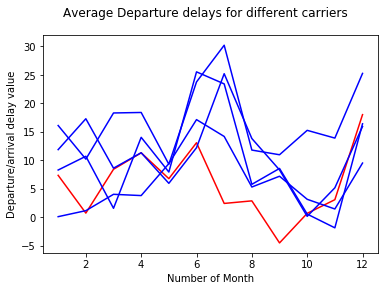

In [156]:
colors = ['red', 'blue', 'blue', 'blue', 'blue']
fig, ax = plt.pyplot.subplots()
for color, mon in zip(colors, sea.carrier.unique()):
    ax.plot(sea.month[sea.carrier == mon].sort_values().unique(), sea[sea.carrier == mon].groupby(['month'])['dep_delay'].mean(), color = color)

fig.suptitle('Average Departure delays for different carriers')
plt.pyplot.xlabel('Number of Month')
plt.pyplot.ylabel('Departure/arrival delay value')
plt.pyplot.show()

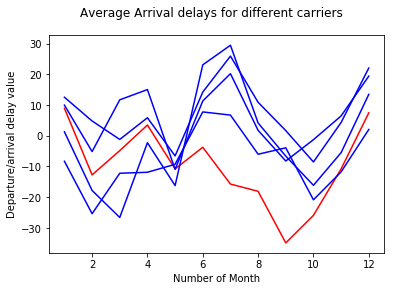

In [157]:
colors = ['red', 'blue', 'blue', 'blue', 'blue']
fig, ax = plt.pyplot.subplots()
for color, mon in zip(colors, sea.carrier.unique()):
    ax.plot(sea.month[sea.carrier == mon].sort_values().unique(), sea[sea.carrier == mon].groupby(['month'])['arr_delay'].mean(), color = color)

fig.suptitle('Average Arrival delays for different carriers')
plt.pyplot.xlabel('Number of Month')
plt.pyplot.ylabel('Departure/arrival delay value')
plt.pyplot.show()

As we can see, the departure and arrival delays are lowest for Alaskan Airlines (red) at its Headquarters (Seattle). However, there is a chance that the monthly averages are skewed because of the negative arrival and departure delay values. To overcome this. let us try to run a logistic regression to see if arrival delay has any effect on the odds of the destination being the headquarters of the carrier.

In [161]:
# Is the destination headquarters
sea = sea[sea.arr_delay > 0]
sea['is_hq'] = np.where(sea['carrier'] == 'AS', 1, 0)

In [162]:
sea = sea.fillna(0)
y = np.asarray(sea['is_hq'])
X = np.asarray(sea[['arr_delay']])
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.535599
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1269
Model:                          Logit   Df Residuals:                     1268
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 Oct 2018   Pseudo R-squ.:                 -0.2726
Time:                        12:07:20   Log-Likelihood:                -679.67
converged:                       True   LL-Null:                       -534.07
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0318      0.002    -13.819      0.000      -0.036      -0.027
==============================================================================
"""

In [163]:
np.exp(model.params)

array([0.96868233])

Hence, for one unit increase in arrival delay, the ODDS of the destination being the headquarters reduces by slightly more than 3% with statistical significance.

## We now perform a similar analysis for Chicago and Atlanta 

### Chicago 

We explore the number of flights and mean arrival & departure delay by all carriers

In [133]:
chi = flights_df[flights_df.dest.isin(['ORD','MDW'])]
x = chi.groupby(['carrier']).size()
print('number of flights of each carrier', x)

chi = flights_df[flights_df.dest.isin(['ORD','MDW'])]
z = chi.groupby(['carrier'])['arr_delay'].mean()
print('mean arrival delay of each carrier', z)

chi = flights_df[flights_df.dest.isin(['ORD','MDW'])]
y = chi.groupby(['carrier'])['dep_delay'].mean()
print('mean departure delay of each carrier', y)

number of flights of each carrier carrier
9E    1056
AA    6059
B6     905
EV       2
MQ    2276
OO       1
UA    6984
WN    4113
dtype: int64
mean arrival delay of each carrier carrier
9E     13.224593
AA     -0.713821
B6     14.869955
EV     17.500000
MQ     16.307105
OO    107.000000
UA      6.066133
WN     12.364224
Name: arr_delay, dtype: float64
mean departure delay of each carrier carrier
9E    23.536906
AA     9.320388
B6    18.138085
EV    15.500000
MQ    17.467268
OO    67.000000
UA    13.972390
WN    18.589763
Name: dep_delay, dtype: float64


We plot a trend line of mean arrival and departure delay for each month for all carriers. United Airlines and American Airlines are highlighted in red.

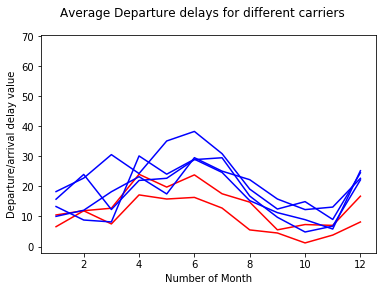

In [134]:
colors = ['red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
fig, ax = plt.pyplot.subplots()
for color, mon in zip(colors, chi.carrier.unique()):
    ax.plot(chi.month[chi.carrier == mon].sort_values().unique(), chi[chi.carrier == mon].groupby(['month'])['dep_delay'].mean(), color = color)

fig.suptitle('Average Departure delays for different carriers')
plt.pyplot.xlabel('Number of Month')
plt.pyplot.ylabel('Departure/arrival delay value')
plt.pyplot.show()

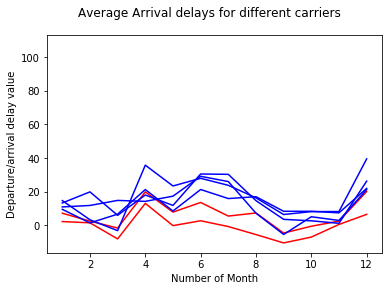

In [135]:
colors = ['red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
fig, ax = plt.pyplot.subplots()
for color, mon in zip(colors, chi.carrier.unique()):
    ax.plot(chi.month[chi.carrier == mon].sort_values().unique(), chi[chi.carrier == mon].groupby(['month'])['arr_delay'].mean(), color = color)

fig.suptitle('Average Arrival delays for different carriers')
plt.pyplot.xlabel('Number of Month')
plt.pyplot.ylabel('Departure/arrival delay value')
plt.pyplot.show()

Again we get similar results, but let us avoid the skewed averages because of negative values, and run a logistic regression.

In [170]:
# Analysis for American Airlines
chi = chi.fillna(0)
chi = chi[chi.arr_delay > 0]
chi['is_hq'] = np.where(chi['carrier'] == 'AA', 1, 0)
y = np.asarray(chi['is_hq'])
X = np.asarray(chi[['arr_delay']])
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.617579
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8072
Model:                          Logit   Df Residuals:                     8071
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 Oct 2018   Pseudo R-squ.:                 -0.1686
Time:                        12:15:38   Log-Likelihood:                -4985.1
converged:                       True   LL-Null:                       -4266.0
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0145      0.001    -28.040      0.000      -0.015      -0.013
==============================================================================
"""

In [171]:
np.exp(model.params)

array([0.98562295])

In [174]:
chi = chi.fillna(0)
chi['is_hq'] = np.where(chi['carrier'] == 'UA', 1, 0)
y = np.asarray(chi['is_hq'])
X = np.asarray(chi[['arr_delay']])
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.664577
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8072
Model:                          Logit   Df Residuals:                     8071
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 Oct 2018   Pseudo R-squ.:                -0.06777
Time:                        12:16:13   Log-Likelihood:                -5364.5
converged:                       True   LL-Null:                       -5024.0
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0075      0.000    -19.415      0.000      -0.008      -0.007
==============================================================================
"""

In [175]:
np.exp(model.params)

array([0.99256013])

As we can see, unit increase in arrival delay results in 1-2% lower odds of destination being the headquarters of the carrier.

### Atlanta 

We explore the number of flights and mean arrival & departure delay by all carriers

In [182]:
atl = flights_df[flights_df.dest.isin(['ATL'])]
y = atl.groupby(['carrier']).size()
print('number of flights of each carrier', y)

atl = flights_df[flights_df.dest.isin(['ATL'])]
z = atl.groupby(['carrier'])['arr_delay'].mean()
print('mean arrival delay of each carrier', z)

atl = flights_df[flights_df.dest.isin(['ATL'])]
x = atl.groupby(['carrier'])['dep_delay'].mean()
print('mean departure delay of each carrier', x)


number of flights of each carrier carrier
9E       59
DL    10571
EV     1764
FL     2337
MQ     2322
UA      103
WN       59
dtype: int64
mean arrival delay of each carrier carrier
9E     0.857143
DL     7.424225
EV    19.638285
FL    20.744513
MQ    14.034004
UA    10.500000
WN     6.896552
Name: arr_delay, dtype: float64
mean departure delay of each carrier carrier
9E     0.964912
DL    10.406336
EV    22.402644
FL    18.445609
MQ     9.353203
UA    15.786408
WN     2.344828
Name: dep_delay, dtype: float64


We plot a trend line of mean arrival and departure delay for each month for all carriers. Delta Airlines is highlighted in red.

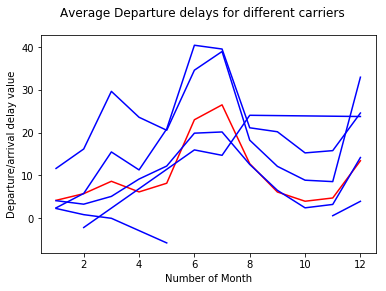

In [183]:
colors = ['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
fig, ax = plt.pyplot.subplots()
for color, mon in zip(colors, atl.carrier.unique()):
    ax.plot(atl.month[atl.carrier == mon].sort_values().unique(), atl[atl.carrier == mon].groupby(['month'])['dep_delay'].mean(), color = color)

fig.suptitle('Average Departure delays for different carriers')
plt.pyplot.xlabel('Number of Month')
plt.pyplot.ylabel('Departure/arrival delay value')
plt.pyplot.show()

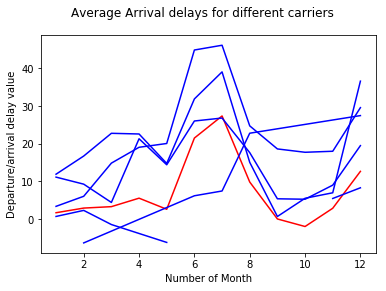

In [184]:
colors = ['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
fig, ax = plt.pyplot.subplots()
for color, mon in zip(colors, atl.carrier.unique()):
    ax.plot(atl.month[atl.carrier == mon].sort_values().unique(), atl[atl.carrier == mon].groupby(['month'])['arr_delay'].mean(), color = color)

fig.suptitle('Average Arrival delays for different carriers')
plt.pyplot.xlabel('Number of Month')
plt.pyplot.ylabel('Departure/arrival delay value')
plt.pyplot.show()

In [185]:
atl = atl.fillna(0)
atl['is_hq'] = np.where(atl['carrier'] == 'DL', 1, 0)
y = np.asarray(atl['is_hq'])
X = np.asarray(atl[['arr_delay']])
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.692226
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                17215
Model:                          Logit   Df Residuals:                    17214
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 Oct 2018   Pseudo R-squ.:                -0.03798
Time:                        12:31:22   Log-Likelihood:                -11917.
converged:                       True   LL-Null:                       -11481.
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0018      0.000     -5.532      0.000      -0.002      -0.001
==============================================================================
"""

In [186]:
np.exp(model.params)

array([0.99817049])

Delta airlines for its HUB in atlanta does not show very strong results supporting our analysis. Though our analysis does explain reasons to pursue this research question more, there are a fair amount of assumptions we have made e.g. we only have data of flights coming from New York, and not the data of all the flights coming into a headquartered city. Looking into all flights coming in Seattle, Chicago or Atlanta can give us a deeper perspective into the matter, while the current assumption is that the data of flights from NY will scale to data of flights from anywhere else.

### Hence, we can justify the research question that arrival and departure delays of carriers with destinations as their headquarters are lower. 